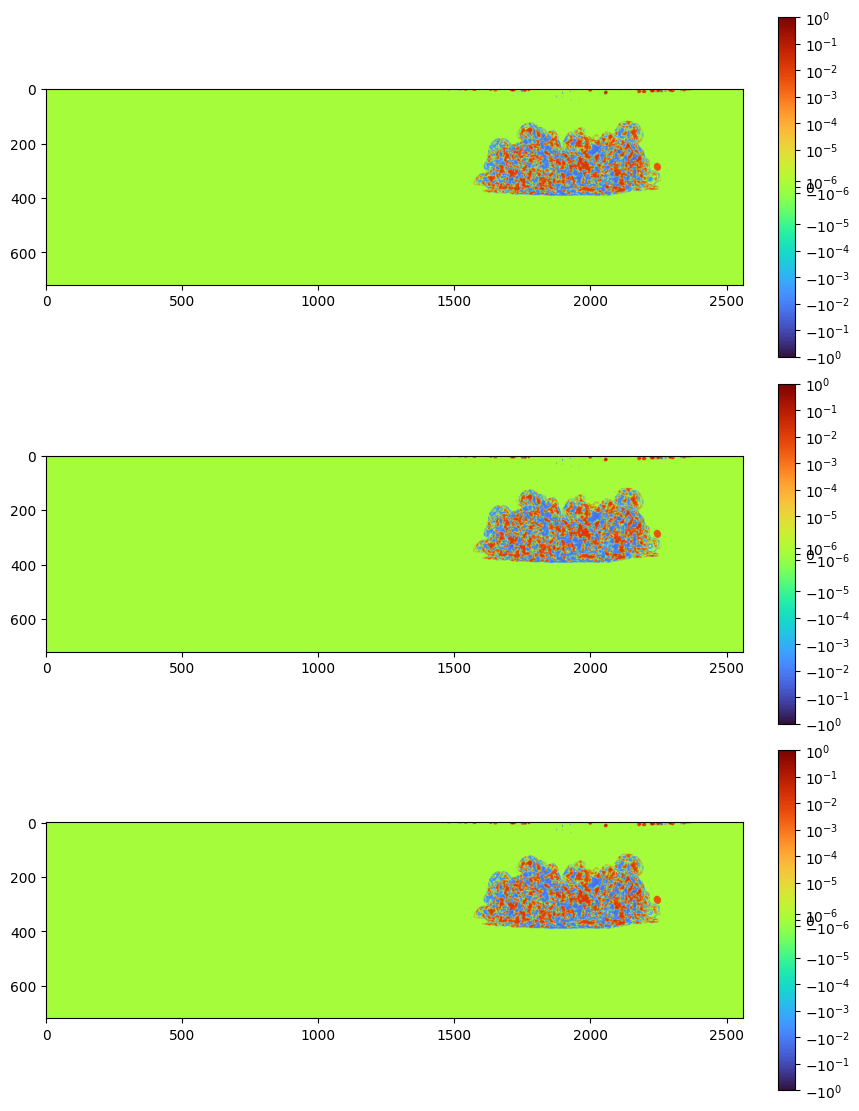

In [39]:
from matplotlib.axes import Axes
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LogNorm, NoNorm, Normalize, SymLogNorm
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np

e = plt.imread(
    "/home/aq85800/NewVolume/gsplat/kernel=EPANECH+rasterization=gsplat/cloud+small+noobject+nobg+200mocap_bogus32e3+viewculling16+noiseupsample4/colmap_47/2025-08-25T16:00-04:00/renders/val_step29999_0000.png"
)
g = plt.imread(
    "/home/aq85800/NewVolume/gsplat/kernel=GAUSSIAN+rasterization=gsplat/cloud+small+noobject+nobg+200mocap_bogus32e3+viewculling16+noiseupsample4/colmap_47/2025-08-25T16:00-04:00/renders/val_step29999_0000.png"
)
d = e - g

fig, axs = plt.subplots(3, 1, figsize=(8.5, 11), layout="constrained")
a: Axes
for i, (c, a) in enumerate(zip(["r", "g", "b"], axs)):
    im = a.imshow(d[..., i], cmap="turbo", norm=SymLogNorm(5e-6, 1, vmin=-1, vmax=1))
    plt.colorbar(im)
fig.show()